# CTD casts

In [1]:
import os, sys, pickle, glob
#import csv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import copy

import datetime

import pandas as pd

# cognac data and tools
import cognac.insitu as insi

---

# load and clean data

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
campaign = 'lopstech19_leg2.yaml'

cp = insi.utils.campaign(campaign)

In [3]:
data_dir = cp['ctd']['path']

files = sorted(glob.glob(data_dir+'*.cnv'))


# microco_leg2
#casts = [2, 3, 4, 5] 
#files = [data_dir+'CTD'+str(c)+'.cnv' for c in casts]
#_ = [print(f) for f in files]

In [4]:
ctd = insi.ctd.ctd(files[1], columns=cp['ctd']['columns'])
ctd.d_time.head()
#(d['pressure'].diff()/d.dt).plot()

,pressure,temperature,salinity,conductivity,altimeter,day,depth,latitude,longitude,flag
time,,,,,,,,,,
2000-01-01 13:00:27.125,-7.618,19.8620,38.1308,51.556544,99.90,1.541979,-7.557,42.91386,5.55546,0.0
2000-01-01 13:00:27.250,-7.618,19.8639,38.1307,51.558444,99.88,1.541981,-7.557,42.91386,5.55546,0.0
2000-01-01 13:00:27.375,-7.618,19.8652,38.1290,51.557911,99.90,1.541982,-7.557,42.91386,5.55546,0.0
2000-01-01 13:00:27.500,-7.618,19.8675,38.1297,51.561254,99.90,1.541984,-7.557,42.91386,5.55546,0.0
2000-01-01 13:00:27.625,-7.618,19.8438,38.1517,51.561714,45.30,1.541985,-7.557,42.91386,5.55546,0.0


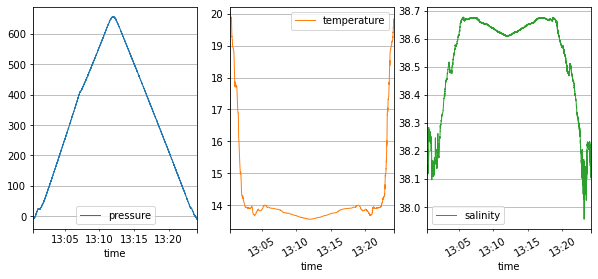

In [5]:
ctd.plot_tseries()

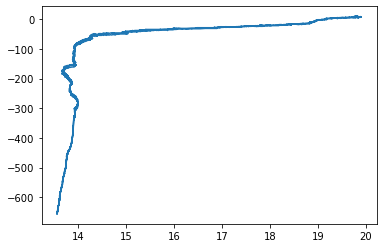

In [6]:
plt.figure()
plt.plot(ctd['temperature'],-ctd['pressure'],'-')

In [7]:
ctd.resample('1S')

In [8]:
ctd.clean_and_depth_bin()

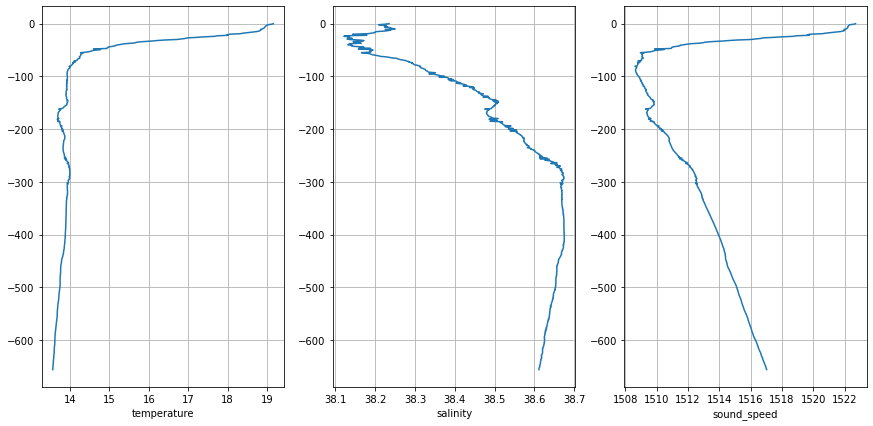

In [9]:
ctd.plot_depth()

In [10]:
ctd.plot_bk()

Loading BokehJS ...

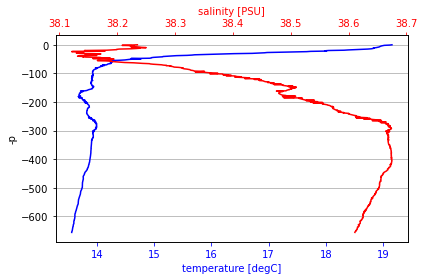

In [11]:
d = ctd.d_depth.reset_index()

fig, ax1 = plt.subplots()
ax1.plot(d['temperature'], -d['pressure'], 'b-')
ax1.set_xlabel('temperature [degC]', color='b')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('-p')
ax1.tick_params('x', colors='b')

ax2 = ax1.twiny()
ax2.plot(d['salinity'], -d['pressure'], 'r-')
ax2.set_xlabel('salinity [PSU]', color='r')
ax2.tick_params('x', colors='r')

ax1.yaxis.grid()
fig.tight_layout()
plt.show()


---
# process all casts

Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/ctd_cast1.p
Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/ctd_cast2.p


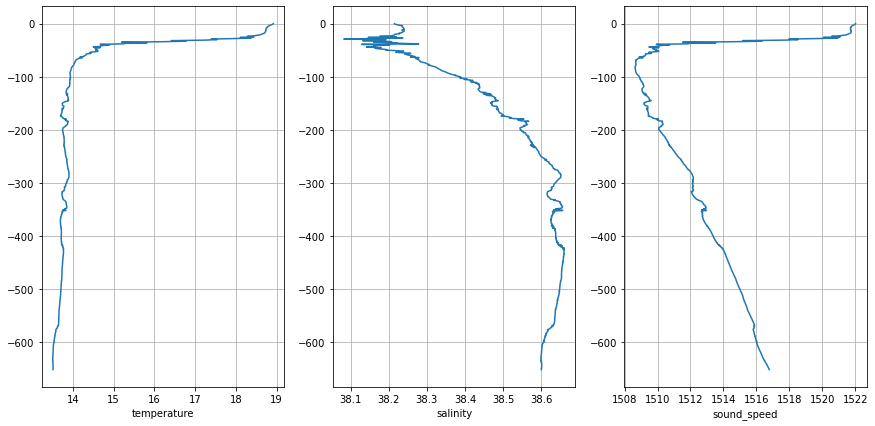

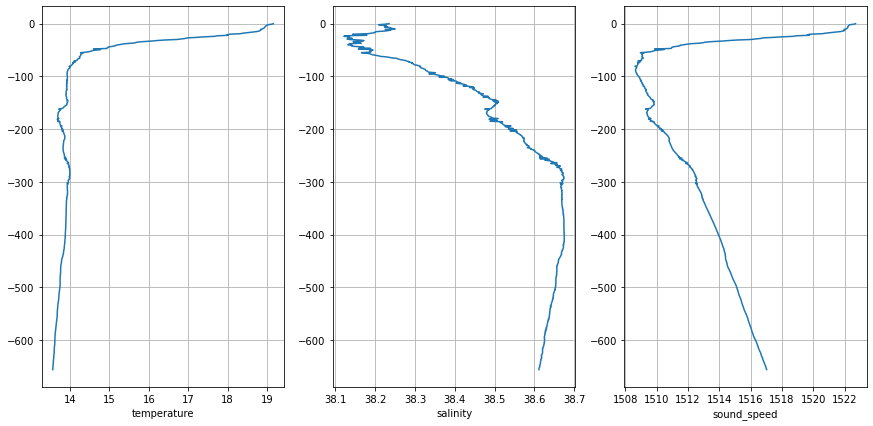

In [12]:
for c,  file in zip(cp['ctd'], files):
    d = insi.ctd.ctd(file, columns=cp['ctd']['columns'])
    d.resample('1S')
    d.clean_and_depth_bin()
    d.plot_depth()
    #d.plot_bk()
    d.to_pickle(cp.pathp+'ctd_%s.p'%c.label)